# Exercises

## Exercise 1: Image characteristics
---

**A.** Distiguishing pixels   

Fluctuations in the activitation of the neuron can be directly observed on the video or in a temporal trace plot of each pixel. Plotting the temporal trace will allow us to see the calcium transient dinamic, if a pixel belonging to a neuron is selected. 

* Select a set of *N* random pixels from the ROI and plot the temporal evolution of pixel value. If the random pixels are choosen from an active neuron, you will be able to see the calcium transcient dynamic. Try this a few time to appreciate the results.

**B.** Temporal statistics of pixel activation
 * For the selected pixels, plot the histogram of pixel value. What are the difference in different regions?, and how can that help to distinguish a pixel that belongs to aneuron from a background pixel?

* If we can already see the calcium traces from individual pixels, why do we need to run source extraction to segment the neurons? Why, as a starter, would not be a good idea to work directly with the temporal traces of the pixels? 

In [1]:
import numpy as np
import pylab as pl
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import psutil
from pathlib import Path
import os

# CaImAn funtions and objects
import caiman as cm
from caiman.motion_correction import MotionCorrect, high_pass_filter_space
from caiman.source_extraction.cnmf import params as params
from caiman.source_extraction import cnmf
from caiman.source_extraction.cnmf.cnmf import load_CNMF

import sys
import os
sys.path.append(os.path.abspath("code"))
from utils import download_data
import auxiliary_functions as aux


import seaborn as sns
sns.set_theme(context='notebook',style='white',font_scale=1.5)


In [2]:
# download data for the lesson (this can take a few minutes)
download_data('https://surfdrive.surf.nl/files/index.php/s/HeYXPdvMO87fbq7')

In [3]:
# set path to video of the full field of view
input_tif_file_path_FOV = 'data/calcium_video.tif'   
input_tif_file_path = 'data/caiman_video_trial_0.tif'  

In [4]:
FOV = cm.load(input_tif_file_path_FOV) # load video with complete field of view (FOV)

In [5]:
# play video (a new window will open)
FOV.play(gain = 1,  #light intensity of video
         magnification = 1, #size of display movie
         fr = 20) # frame rate at which the movie is played

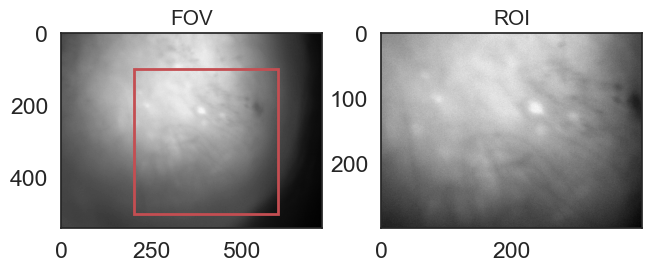

In [6]:
# Let's visualize the FOV and the ROI
aux.plot_FOV(FOV_file = input_tif_file_path_FOV , ROI_file = input_tif_file_path)

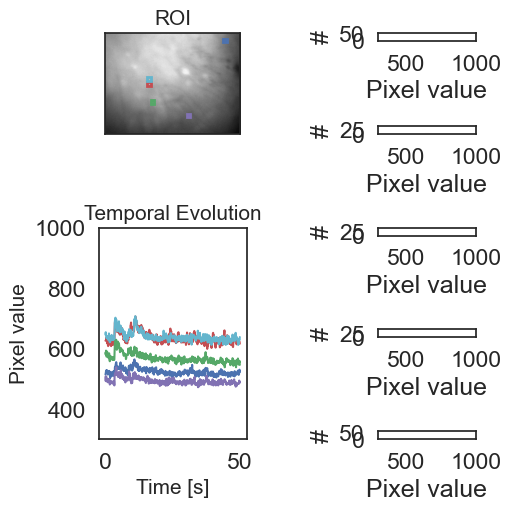

In [12]:
from auxiliary_functions import temporal_evolution as temporal_evolution 

temporal_evolution(file_name=input_tif_file_path, output_file_name='outputtest123')


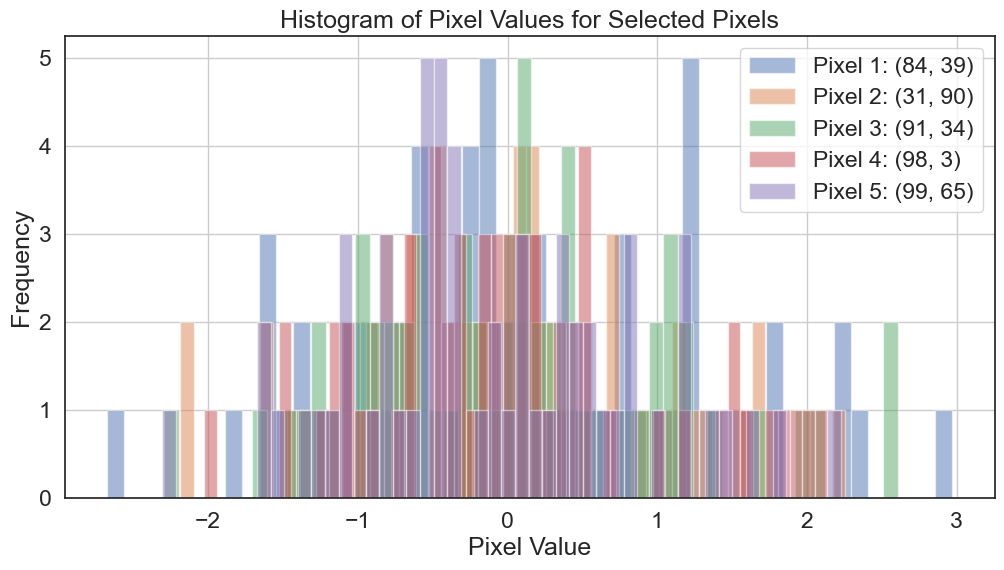

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Define the shape of the ROI
height = 100
width = 100
time = 60

# Create a synthetic 3D LFP signal
lfp_signal = np.random.randn(height, width, time)

# Define the coordinates of the selected pixels
selected_pixels = [(84, 39), (31, 90), (91, 34), (98, 3), (99, 65)]
# Plot histograms of pixel values for the selected pixels
plt.figure(figsize=(12, 6))
for i, (y, x) in enumerate(selected_pixels):
    pixel_values = lfp_signal[y, x, :]
    plt.hist(pixel_values, bins=50, alpha=0.5, label=f'Pixel {i+1}: ({y}, {x})')

plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.title('Histogram of Pixel Values for Selected Pixels')
plt.legend()
plt.grid(True)
plt.show()


You can see changes that happen because of neural activity by showing how the values of pixels change over time. If you choose random pixels from a ROI and those pixels are from active neurons, you'll see calcium transient dynamics in their traces. Neurons are usually made up of many pixels, and their activity shows up as changes that are linked across these pixels. Neural activity result in higher pixel values. Noise in single-pixel traces can make it hard to tell the difference between real neural activity and changes in the background. By combining data from several frames within a clearly defined area, source extraction methods help reduce noise.
 
